In [150]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np 
import datetime
from scipy.stats import linregress
import locale
import matplotlib.pyplot as plot 

In [155]:
# Make a reference to the comic_books_expanded.csv file path
csv_path_income = Path("Apple_Combined_Income_Statement1.csv")
csv_path_aapl = Path("aapl.csv")
csv_path_percent_change = Path("EPS_Apple_Percent_Change.csv")

# Income_Statement Dataframe
income_statement_df = pd.read_csv(csv_path_income, encoding="utf-8")

# Check the special characters imported correctly
print (income_statement_df)

         Date  Total net sales  Total cost of sales  Gross margin  \
0   9/24/2022         394328.0             223546.0      170782.0   
1   9/27/2021         365817.0             212981.0      152836.0   
2   9/28/2020         274515.0             169559.0      104956.0   
3   9/27/2019         260174.0             161782.0       98392.0   
4   9/28/2018         265595.0             163756.0      101839.0   
5   9/27/2017         229234.0             141048.0       88186.0   
6   9/26/2016         215639.0             131376.0       84263.0   
7   9/28/2015         233715.0             140089.0       93626.0   
8   9/26/2014         182795.0             112258.0       70537.0   
9   9/27/2013         170910.0             106606.0       64304.0   
10  9/27/2012         156508.0              87846.0       68662.0   
11  9/27/2011         108249.0              64431.0       43818.0   
12  9/27/2010          65225.0              39541.0       25684.0   
13  9/27/2009          42905.0    

In [156]:
aapl_eps_percent_change = pd.read_csv(csv_path_percent_change, encoding="utf-8")
print(aapl_eps_percent_change)

    Date  Apple  Percent Change
0   2022   6.11             NaN
1   2021   5.61            8.91
2   2020   3.28           71.04
3   2019  11.89          -72.41
4   2018  11.91           -0.17
5   2017   9.21           29.32
6   2016   8.31           10.83
7   2015   9.22           -9.87
8   2014   6.45           42.95
9   2013  39.75          -83.77
10  2012  44.15           -9.97
11  2011  27.68           59.50
12  2010  15.15           82.71
13  2009   9.08           66.85


In [91]:
#AAPL Dataframe 
aapl_df = pd.read_csv(csv_path_aapl, encoding="utf-8")

# Check the special characters imported correctly
print (aapl_df).head(5)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100178   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094952   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087983   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090160   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092774   
...           ...         ...         ...         ...         ...         ...   
10463  2022-06-13  132.869995  135.199997  131.440002  131.880005  131.880005   
10464  2022-06-14  133.130005  133.889999  131.479996  132.759995  132.759995   
10465  2022-06-15  134.289993  137.339996  132.160004  135.429993  135.429993   
10466  2022-06-16  132.080002  132.389999  129.039993  130.059998  130.059998   
10467  2022-06-17  130.070007  133.080002  129.809998  131.559998  131.559998   

          Volume  
0      4

AttributeError: 'NoneType' object has no attribute 'head'

In [92]:
income_statement_df.dtypes

Date                                                    object
Total net sales                                        float64
Total cost of sales                                    float64
Gross margin                                           float64
Research and development Expense                       float64
Selling, general and administrative expense            float64
Total operating expenses                               float64
Operating income                                       float64
Other income/(expense), net                            float64
Income before provision for income taxes               float64
Provision for income taxes                             float64
Net income                                             float64
Earnings per share Basic:                              float64
Earning per share Diluted                              float64
Shares used in computing earnings per share Basic      float64
Shares used in computing earnings per share Diluted    

In [93]:
income_statement_df['Date'] = pd.to_datetime(income_statement_df['Date'], errors='coerce')

In [94]:
income_statement_df.dtypes

Date                                                   datetime64[ns]
Total net sales                                               float64
Total cost of sales                                           float64
Gross margin                                                  float64
Research and development Expense                              float64
Selling, general and administrative expense                   float64
Total operating expenses                                      float64
Operating income                                              float64
Other income/(expense), net                                   float64
Income before provision for income taxes                      float64
Provision for income taxes                                    float64
Net income                                                    float64
Earnings per share Basic:                                     float64
Earning per share Diluted                                     float64
Shares used in compu

In [95]:
aapl_df['Date'] =pd.to_datetime(aapl_df.Date)

In [96]:
aapl_date_df = aapl_df.loc[(aapl_df['Date'] >= '2009-12-31')]

In [97]:
aapl_sales_combined_df = pd.merge(aapl_date_df, income_statement_df,how ="outer",on = "Date")
aapl_sales_combined_df 

,Date,Open,High,Low,Close,Adj Close,Volume,Total net sales,Total cost of sales,Gross margin,...,Total operating expenses,Operating income,"Other income/(expense), net",Income before provision for income taxes,Provision for income taxes,Net income,Earnings per share Basic:,Earning per share Diluted,Shares used in computing earnings per share Basic,Shares used in computing earnings per share Diluted
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.434926,352410800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535084,493729600.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546384,601904800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442255,552160000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430346,477131200.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3136,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3137,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.559998,134118500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3138,2022-09-24,NaN,NaN,NaN,NaN,NaN,NaN,394328.0,223546.0,170782.0,...,51345.0,119437.0,-334.0,119103.0,19300.0,99803.0,6.15,6.11,16215963.0,16325819.0


In [98]:
aapl_sales_combined_df = aapl_sales_combined_df.dropna()
aapl_sales_combined_df

,Date,Open,High,Low,Close,Adj Close,Volume,Total net sales,Total cost of sales,Gross margin,...,Total operating expenses,Operating income,"Other income/(expense), net",Income before provision for income taxes,Provision for income taxes,Net income,Earnings per share Basic:,Earning per share Diluted,Shares used in computing earnings per share Basic,Shares used in computing earnings per share Diluted
185,2010-09-27,10.499286,10.526071,10.393214,10.398571,8.890965,482834800.0,65225.0,39541.0,25684.0,...,7299.0,18385.0,155.0,18540.0,4527.0,14013.0,15.41,15.15,909461.0,924712.0
438,2011-09-27,14.597500,14.616071,14.216429,14.259286,12.191944,632497600.0,108249.0,64431.0,43818.0,...,10028.0,33790.0,415.0,34205.0,8283.0,25922.0,28.05,27.68,924258.0,936645.0
691,2012-09-27,23.724644,24.363214,23.583929,24.332857,20.894360,594090000.0,156508.0,87846.0,68662.0,...,13421.0,55241.0,522.0,55763.0,14030.0,41733.0,44.64,44.15,934818.0,945355.0
941,2013-09-27,17.277857,17.309643,17.168571,17.241072,15.157449,228040400.0,170910.0,106606.0,64304.0,...,15305.0,48999.0,1156.0,50155.0,13118.0,37037.0,40.03,39.75,925331.0,931662.0
1192,2014-09-26,24.632500,25.187500,24.600000,25.187500,22.643364,249482000.0,182795.0,112258.0,70537.0,...,18034.0,52503.0,980.0,53483.0,13973.0,39510.0,6.49,6.45,6085572.0,6122663.0
1444,2015-09-28,28.462500,28.642500,28.110001,28.110001,25.702663,208436000.0,233715.0,140089.0,93626.0,...,22396.0,71230.0,1285.0,72515.0,19121.0,53394.0,9.28,9.22,5753421.0,5793069.0
1695,2016-09-26,27.910000,28.347500,27.887501,28.219999,26.354937,119477600.0,215639.0,131376.0,84263.0,...,24239.0,60024.0,1348.0,61372.0,15685.0,45687.0,8.35,8.31,5470820.0,5500281.0
1948,2017-09-27,38.450001,38.680000,38.384998,38.557499,36.644424,102016800.0,229234.0,141048.0,88186.0,...,26842.0,61344.0,2745.0,64089.0,15738.0,48351.0,9.27,9.21,5217242.0,5251692.0
2201,2018-09-28,56.197498,56.459999,56.005001,56.435001,54.445862,91717600.0,265595.0,163756.0,101839.0,...,30941.0,70898.0,2005.0,72903.0,13372.0,59531.0,12.01,11.91,4955377.0,5000109.0
2451,2019-09-27,55.134998,55.240002,54.320000,54.705002,53.595825,101408000.0,260174.0,161782.0,98392.0,...,34462.0,63930.0,1807.0,65737.0,10481.0,55256.0,11.97,11.89,4617834.0,4648913.0


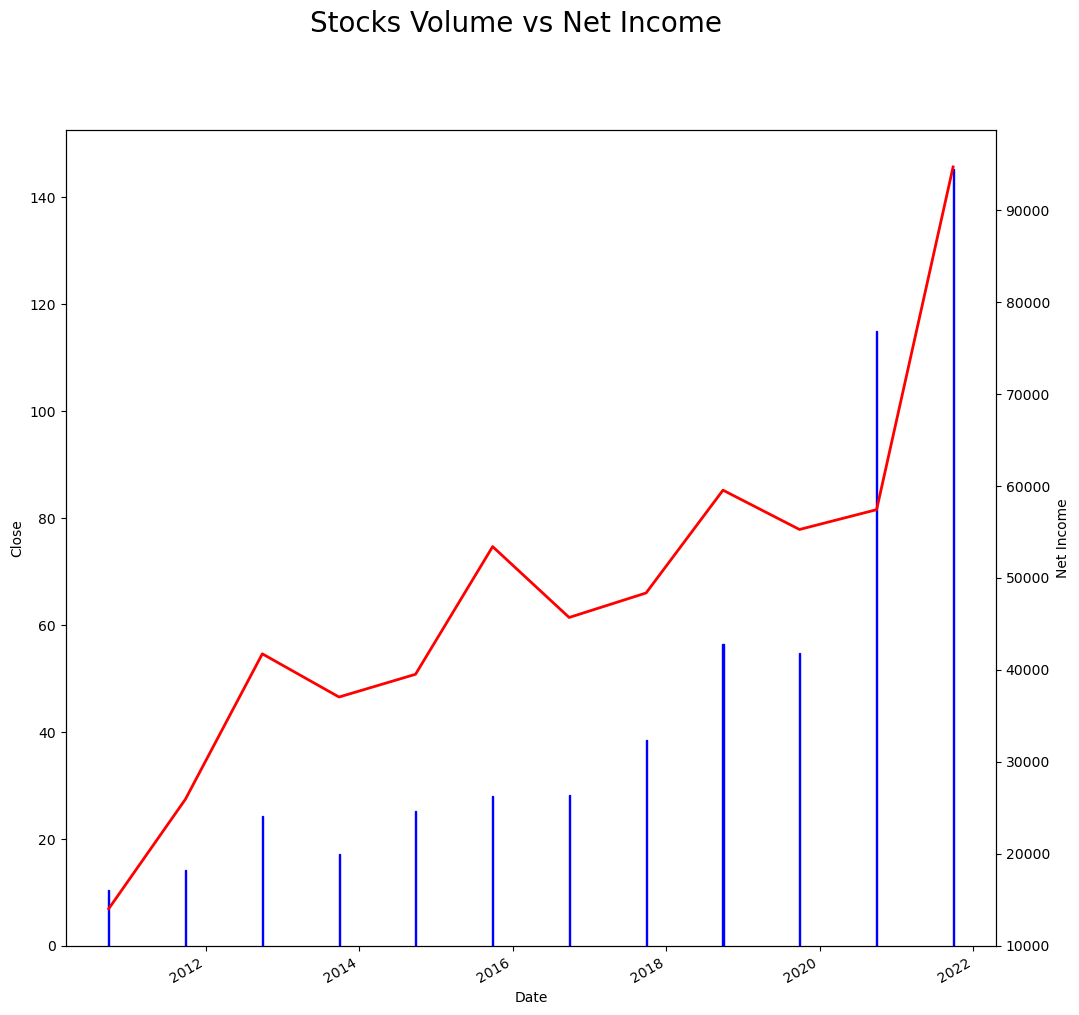

In [99]:
fig, ax1 = plt.subplots(figsize=(12, 12))
ax2 = ax1.twinx()

Date = aapl_sales_combined_df['Date']
Net_Income = aapl_sales_combined_df['Net income']
Close = aapl_sales_combined_df['Close']

ax1.bar(Date, Close, color="blue", edgecolor="blue", width=5.0)
ax2.plot(Date, Net_Income, color="red", lw=2)

ax1.set_xlabel("Date")
ax1.set_ylabel("Close")
ax1.tick_params(axis="y")

ax2.set_ylabel("Net Income")
ax2.tick_params(axis="y")

fig.autofmt_xdate()
fig.suptitle("Stocks Volume vs Net Income", fontsize=20);

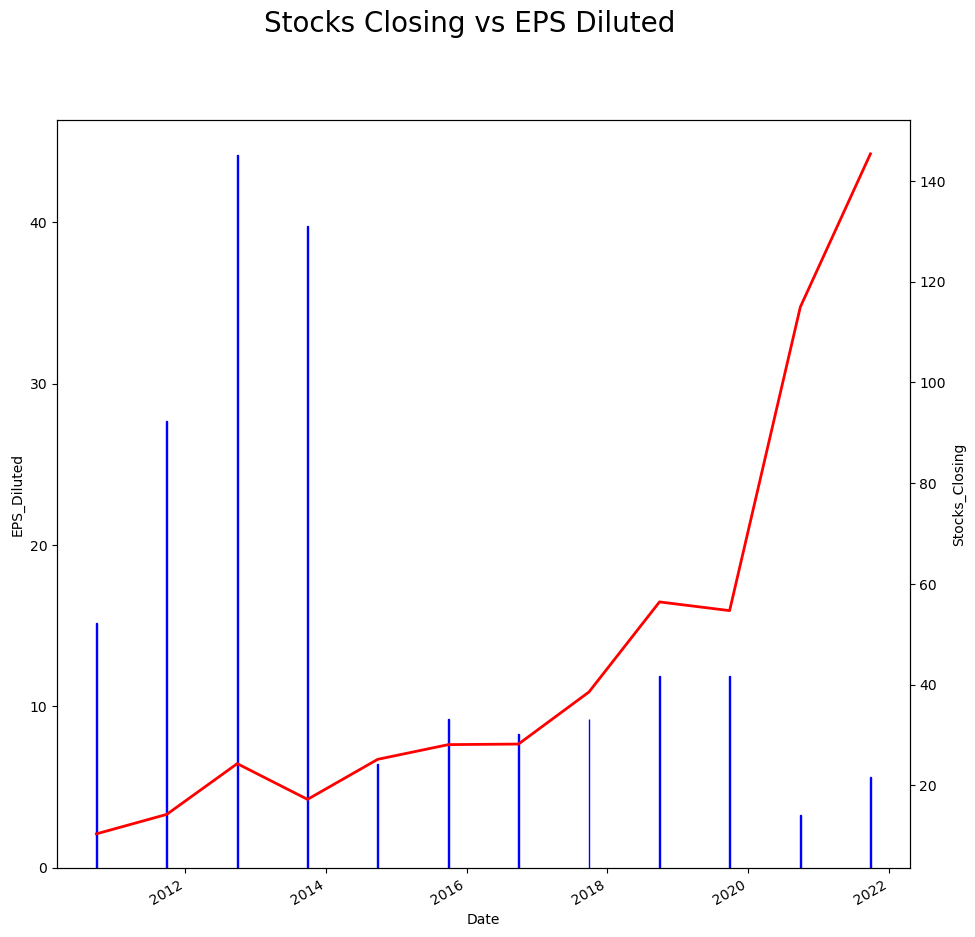

In [100]:
fig, ax1 = plt.subplots(figsize=(11, 11))
ax2 = ax1.twinx()

Date = aapl_sales_combined_df['Date']
EPS_Diluted = aapl_sales_combined_df['Earning per share Diluted']
Stocks_Closing = aapl_sales_combined_df['Close']


ax1.bar(Date, EPS_Diluted, color="blue", edgecolor="blue", width=5.0)
ax2.plot(Date, Stocks_Closing, color="red", lw=2)

ax1.set_xlabel("Date")
ax1.set_ylabel("EPS_Diluted")
ax1.tick_params(axis="y")

ax2.set_ylabel("Stocks_Closing")
ax2.tick_params(axis="y")

fig.autofmt_xdate()
fig.suptitle("Stocks Closing vs EPS Diluted", fontsize=20);

The r-value is -0.4981717172018084


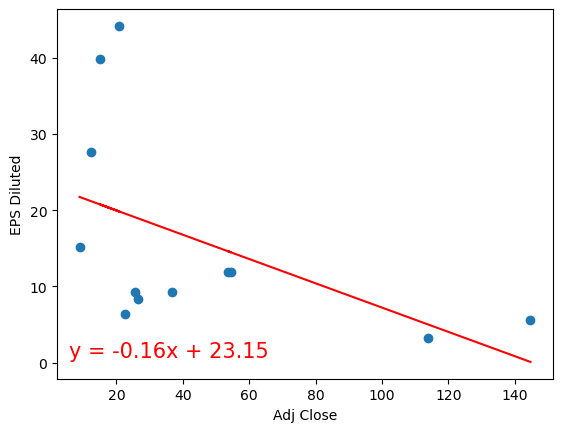

In [101]:
x_values = aapl_sales_combined_df['Adj Close']
y_values = aapl_sales_combined_df['Earning per share Diluted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Adj Close")
plt.ylabel("EPS Diluted")
print(f'The r-value is {rvalue}')

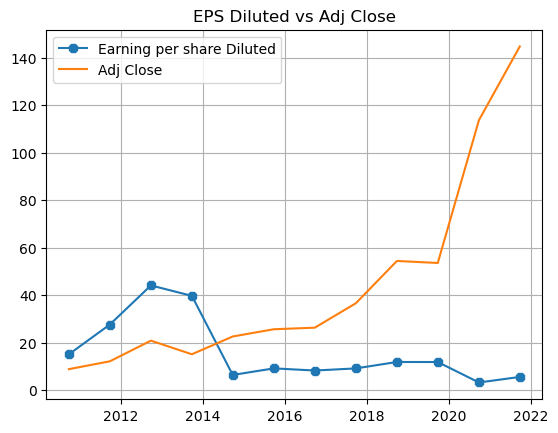

In [102]:
x_values = aapl_sales_combined_df['Date']
y_values = aapl_sales_combined_df['Earning per share Diluted']

x1_values = aapl_sales_combined_df['Date']
y1_values = aapl_sales_combined_df['Adj Close']

plt.plot(x_values, y_values, marker = "8", label='Earning per share Diluted')
plt.plot(x1_values, y1_values, label='Adj Close')

plt.legend()
#plt.xlabel('Date')
#plt.ylabel('Y-axis')
plt.title('EPS Diluted vs Adj Close')

plt.grid()
plt.show()

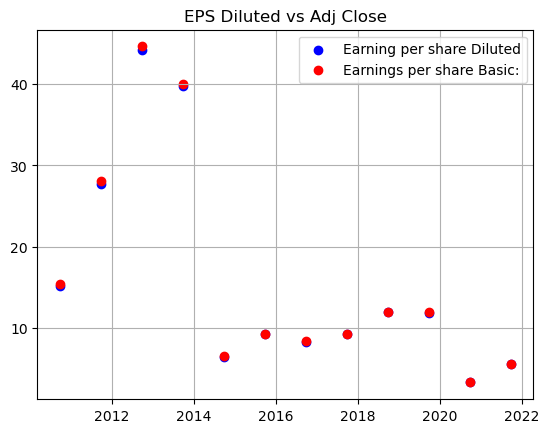

In [120]:
x_values = aapl_sales_combined_df['Date']
y_values = aapl_sales_combined_df['Earning per share Diluted']

x1_values = aapl_sales_combined_df['Date']
y1_values = aapl_sales_combined_df['Earnings per share Basic:']

plt.scatter(x_values, y_values, color="blue", label='Earning per share Diluted')
plt.scatter(x1_values, y1_values, color="red", label='Earnings per share Basic:')

plt.legend()
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
plt.title('EPS Diluted vs Adj Close')

plt.grid(5)
plt.show()

In [108]:
x_values = aapl_sales_combined_df['Date']
print (x_values)

185    2010-09-27
438    2011-09-27
691    2012-09-27
941    2013-09-27
1192   2014-09-26
1444   2015-09-28
1695   2016-09-26
1948   2017-09-27
2201   2018-09-28
2451   2019-09-27
2703   2020-09-28
2954   2021-09-27
Name: Date, dtype: datetime64[ns]


In [113]:
y_values = aapl_sales_combined_df['Earning per share Diluted']
print(y_values)

185     15.15
438     27.68
691     44.15
941     39.75
1192     6.45
1444     9.22
1695     8.31
1948     9.21
2201    11.91
2451    11.89
2703     3.28
2954     5.61
Name: Earning per share Diluted, dtype: float64


In [132]:
eps_df = aapl_sales_combined_df[['Earnings per share Basic:','Earning per share Diluted']]
eps_df.head

<bound method NDFrame.head of       Earnings per share Basic:  Earning per share Diluted
185                       15.41                      15.15
438                       28.05                      27.68
691                       44.64                      44.15
941                       40.03                      39.75
1192                       6.49                       6.45
1444                       9.28                       9.22
1695                       8.35                       8.31
1948                       9.27                       9.21
2201                      12.01                      11.91
2451                      11.97                      11.89
2703                       3.31                       3.28
2954                       5.57                       5.61>

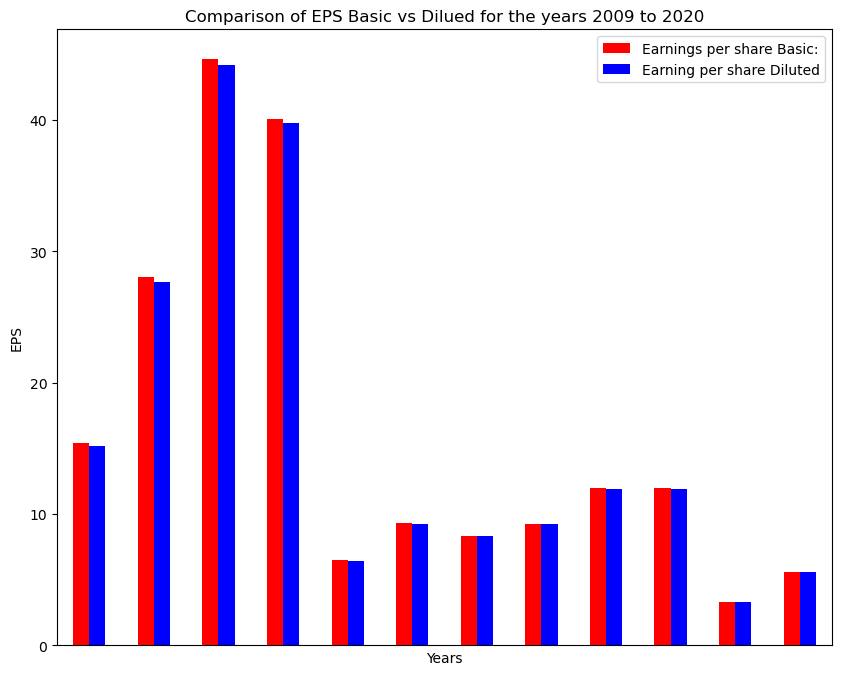

In [171]:
eps_df.plot(kind="bar", color=["red", "blue"], figsize=(10,8),
                                   title="Comparison of EPS Basic vs Dilued for the years 2009 to 2020",
                                   xlabel="Years",
                                   ylabel="EPS")
plt.tick_params(labelbottom = False, bottom = False) 

# Show plot
plt.show()

In [172]:
aapl_eps_percent_change.dtypes

Date                int64
Apple             float64
Percent Change    float64
dtype: object

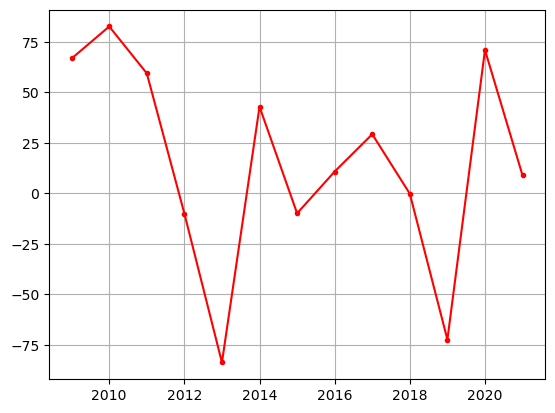

In [173]:
xaxis = aapl_eps_percent_change ['Date']
yaxis = aapl_eps_percent_change ['Percent Change']
Percent_change = plt.plot(xaxis, yaxis, color="red", marker = '.')

plt.title=("EPS % Change from 2009 to 2022")
plt.xlabel=("Years")
plt.ylabel=("EPS % Change")

plt.grid()
plt.show()